In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load overall_results.json
with open('results/overall_results.json', 'r') as f:
    results = json.load(f)

best_threshold = results['best_threshold']
best_test_accuracy = results['best_test_accuracy']
all_thresholds_results = results['all_thresholds_results']


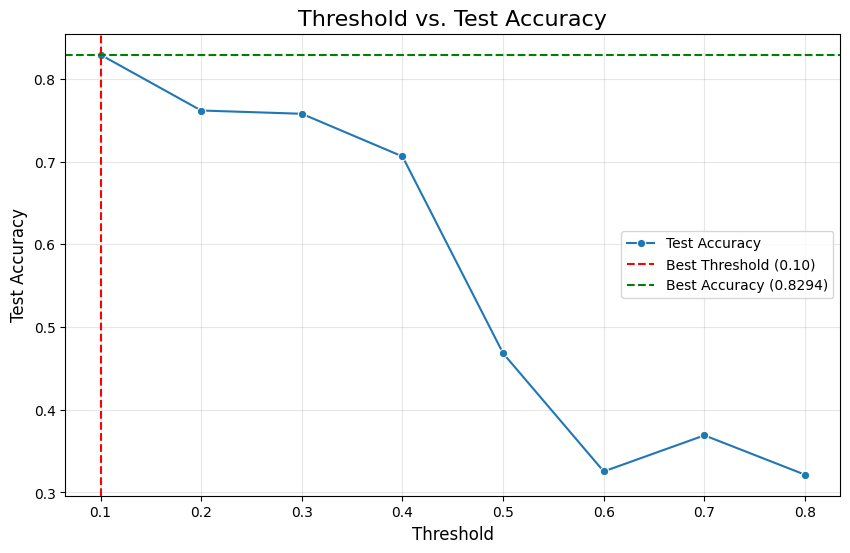

In [2]:
# Prepare data
thresholds = [float(k) for k in all_thresholds_results.keys()]
test_accuracies = [v['test_accuracy'] for v in all_thresholds_results.values()]

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=thresholds, y=test_accuracies, marker="o", label="Test Accuracy")
plt.axvline(best_threshold, color='red', linestyle='--', label=f"Best Threshold ({best_threshold:.2f})")
plt.axhline(best_test_accuracy, color='green', linestyle='--', label=f"Best Accuracy ({best_test_accuracy:.4f})")
plt.title("Threshold vs. Test Accuracy", fontsize=16)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


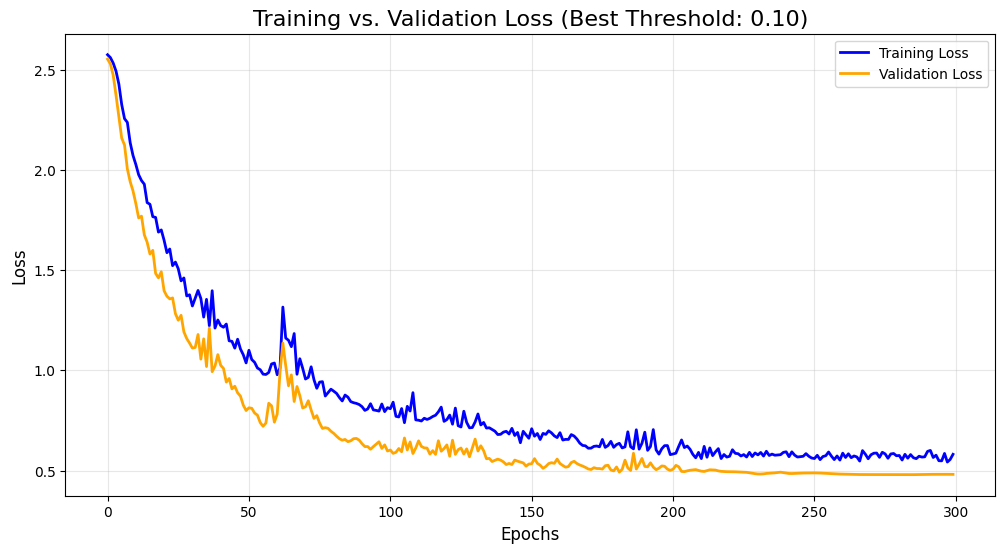

In [3]:
# Extract the best threshold's training history
best_history = all_thresholds_results[str(best_threshold)]['training_history']

train_losses = best_history['train_loss']
val_losses = best_history['val_loss']
epochs = range(len(train_losses))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses, label="Training Loss", color='blue', linewidth=2)
plt.plot(epochs, val_losses, label="Validation Loss", color='orange', linewidth=2)
plt.title(f"Training vs. Validation Loss (Best Threshold: {best_threshold:.2f})", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


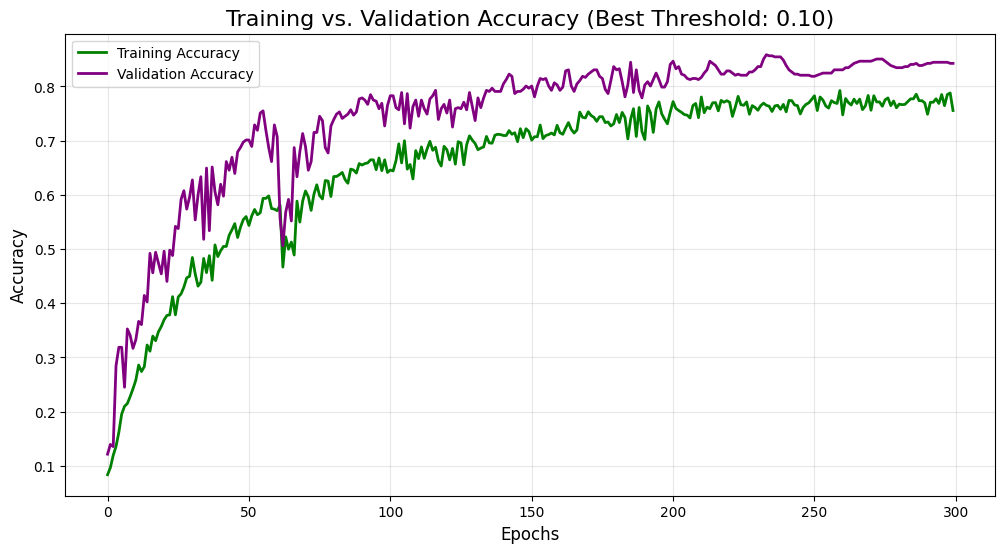

In [4]:
# Extract accuracies
train_acc = best_history['train_acc']
val_acc = best_history['val_acc']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, label="Training Accuracy", color='green', linewidth=2)
plt.plot(epochs, val_acc, label="Validation Accuracy", color='purple', linewidth=2)
plt.title(f"Training vs. Validation Accuracy (Best Threshold: {best_threshold:.2f})", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


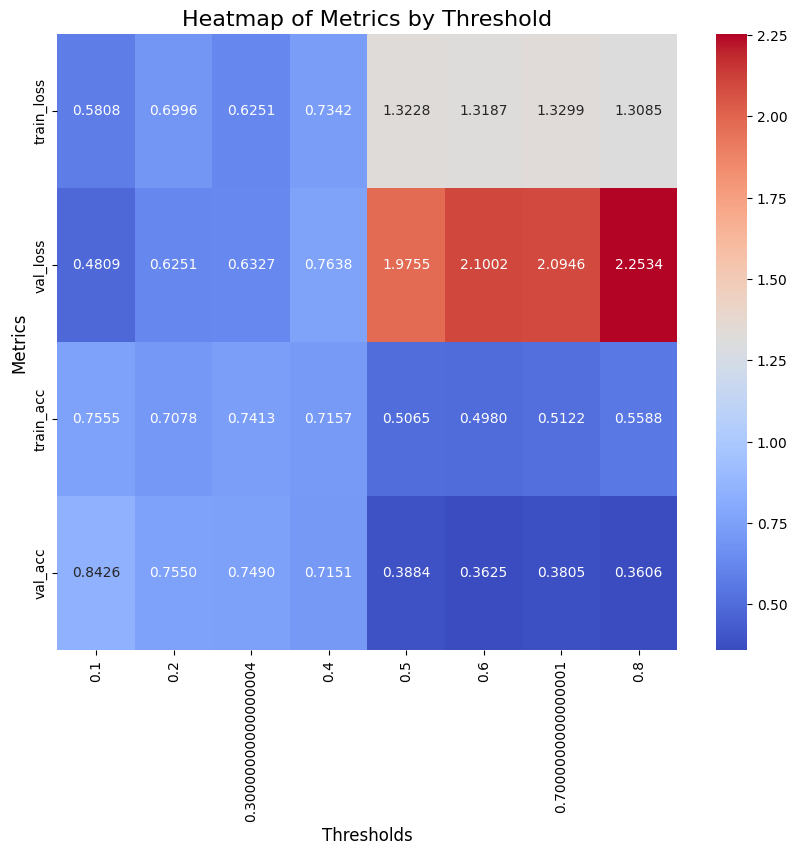

In [5]:
# Prepare data for heatmap
metrics = ['train_loss', 'val_loss', 'train_acc', 'val_acc']
heatmap_data = {metric: [] for metric in metrics}

for k, v in all_thresholds_results.items():
    for metric in metrics:
        heatmap_data[metric].append(v['training_history'][metric][-1])

heatmap_df = np.array([heatmap_data[metric] for metric in metrics])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, xticklabels=thresholds, yticklabels=metrics, cmap="coolwarm", fmt=".4f")
plt.title("Heatmap of Metrics by Threshold", fontsize=16)
plt.xlabel("Thresholds", fontsize=12)
plt.ylabel("Metrics", fontsize=12)
plt.show()


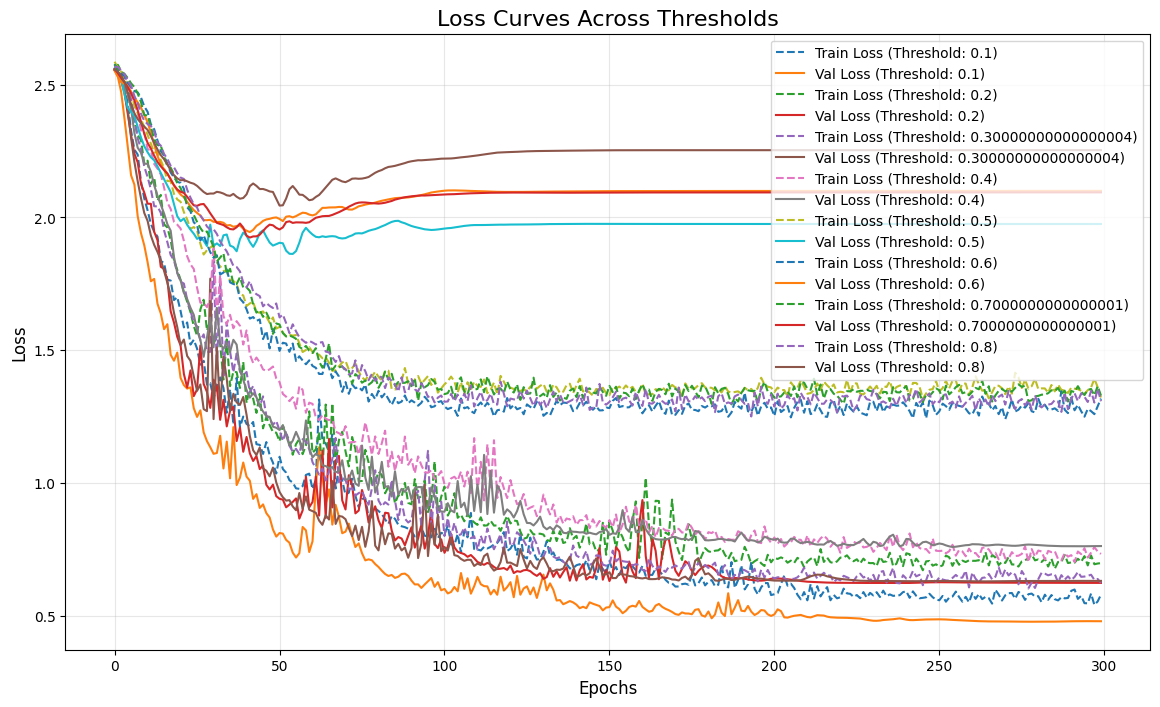

In [6]:
plt.figure(figsize=(14, 8))

for k, v in all_thresholds_results.items():
    train_loss = v['training_history']['train_loss']
    val_loss = v['training_history']['val_loss']
    plt.plot(train_loss, label=f"Train Loss (Threshold: {k})", linestyle='--')
    plt.plot(val_loss, label=f"Val Loss (Threshold: {k})", linestyle='-')

plt.title("Loss Curves Across Thresholds", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(alpha=0.3)
plt.show()


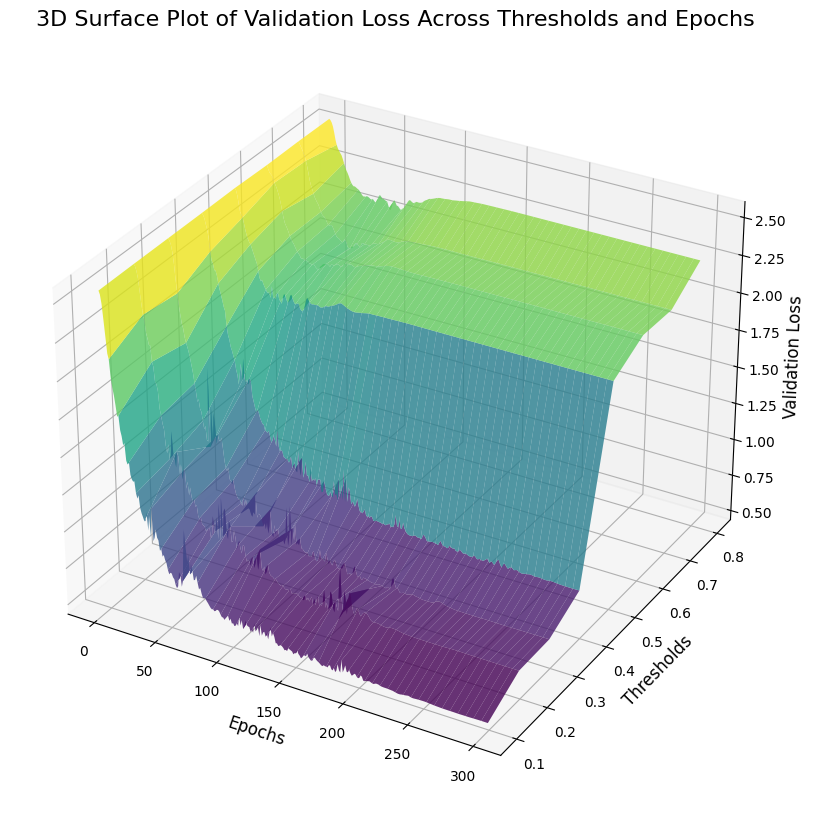

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D plot
thresholds = np.array(thresholds)
epochs = np.arange(len(train_losses))
X, Y = np.meshgrid(epochs, thresholds)
Z = np.array([all_thresholds_results[str(threshold)]['training_history']['val_loss'] for threshold in thresholds])

# Plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8)
ax.set_title("3D Surface Plot of Validation Loss Across Thresholds and Epochs", fontsize=16)
ax.set_xlabel("Epochs", fontsize=12)
ax.set_ylabel("Thresholds", fontsize=12)
ax.set_zlabel("Validation Loss", fontsize=12)
plt.show()
